In [2]:
pip install piml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 34.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.2 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=716c723f65ad2ade8ffcf1c5584e77e33f26b84f767bc25eefba2b9994535508
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a2

**Import Necessary packages**

In [3]:
from piml import Experiment
exp = Experiment()
import pandas as pd                                           # for dataframe manipulation
import time                                                   # for timers
import datetime                                               # for timestamp 

# set random seed for better reproducibility
SEED = 12345 

**Start Global Timer**

In [4]:
tic = time.time()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

**Import Data**

In [5]:
#Run only If using colab to upload the data 
import io
from google.colab import files
uploaded = files.upload() # upload training and test data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Saving hmda_test_preprocessed.csv to hmda_test_preprocessed.csv
Saving hmda_train_preprocessed.csv to hmda_train_preprocessed.csv


In [6]:
#Importing training and testing datasets to pandas dataframes
data = pd.read_csv('hmda_train_preprocessed.csv')
exp.data_loader(data=data)
test = pd.read_csv('hmda_test_preprocessed.csv')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,row_id,black,asian,white,amind,hipac,hispanic,non_hispanic,male,female,agegte62,agelt62,term_360,conforming,debt_to_income_ratio_missing,loan_amount_std,loan_to_value_ratio_std,no_intro_rate_period_std,intro_rate_period_std,property_value_std,income_std,debt_to_income_ratio_std,high_priced
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.514393,0.333922,0.244394,-0.215304,-0.535932,-0.040307,0.854601,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,1.0,0.0,1.0,1.0,0.0,-0.118642,0.268727,0.244394,-0.215304,-0.227585,-0.018133,-0.425131,0.0
2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,0.0,-0.778227,0.228996,-4.091747,4.610857,-0.720941,-0.032338,0.123326,0.0
3,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.0,-0.074670,-1.150240,0.244394,-0.215304,0.358276,-0.018133,-0.425131,0.0
4,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,1.0,1.0,1.0,0.0,-0.602338,0.552520,0.244394,-0.215304,-0.628437,-0.038228,0.763191,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160333,160333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.365054,0.663316,0.244394,-0.215304,0.019094,-0.015361,1.585876,0.0
160334,160334.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,1.0,1.0,0.0,-0.558366,0.552520,0.244394,-0.215304,-0.597602,-0.039268,1.585876,0.0
160335,160335.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,9.599253,-0.463082,-4.091747,2.197776,9.084518,0.270486,0.397554,0.0
160336,160336.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,NaN,1.0,1.0,0.0,-0.998089,0.552520,0.244394,-0.215304,-0.905950,-0.039614,-0.425131,0.0


**Data Summary**

In [7]:
#specify the features to be removed and Obtain data summary information 
exp.data_summary(feature_exclude=['row_id','black','asian','white','amind','hipac','hispanic','non_hispanic','male','female','agegte62','agelt62'])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='Data Shape:(160338, 23)')

**Data Preparation**

In [8]:
#prepare data by defining the target variable, task type and test ratio (70% train 30% test) 
#and setting the random seed preserve reproducibility 
exp.data_prepare(target='high_priced', task_type='Classification', test_ratio=0.3, random_state=SEED)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,Config,Value
0,Excluded columns,"[hipac, asian, agegte62, agelt62, white, row_id, male, black, non_hispanic, hispanic, female, amind]"
1,Target variable,high_priced
2,Sample weight,None
3,Task type,Classification
4,Split method,Random
5,Test ratio,0.3
6,Random state,12345
7,Train test energy distance,0.000065


In [9]:
exp.get_feature_names()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

['term_360',
 'conforming',
 'debt_to_income_ratio_missing',
 'loan_amount_std',
 'loan_to_value_ratio_std',
 'no_intro_rate_period_std',
 'intro_rate_period_std',
 'property_value_std',
 'income_std',
 'debt_to_income_ratio_std']

### **Basic Data Exploration**

In [10]:
exp.eda()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

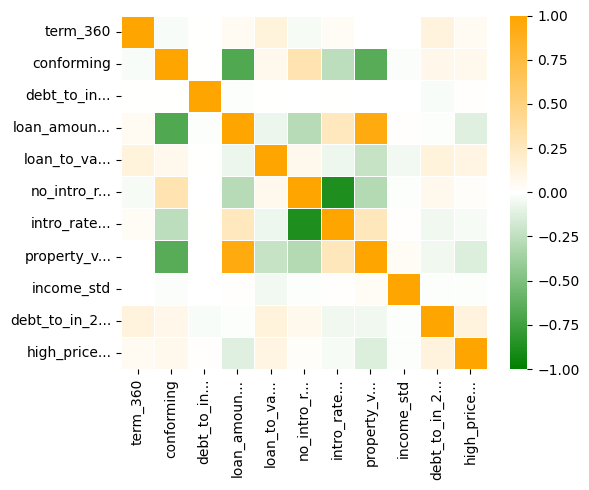

In [11]:
#generating correlation heatmap
exp.eda(show='multivariate', multi_type='correlation_heatmap', figsize=(6, 5))

There is significant correlation observed among the variables in the dataset, highlighting interesting relationships. For instance, the **property_value_std** and **loan_amount_std** exhibit a significant positive correlation, which intuitively aligns with expectations. Additionally, it intriguing to note the strong negative correlation between **conforming** and both **loan_amount_std** and **property_value_std**.

Nevertheless, there are two variables, namely **debt_to_income_ratio_std** and **income_std**, that do not show significant correlations with the majority of other variables in the dataset.

In [12]:
#Defining input features 
x_names = ['term_360', 'conforming', 'debt_to_income_ratio_missing', 'loan_amount_std', 'loan_to_value_ratio_std', 'no_intro_rate_period_std',
           'intro_rate_period_std', 'property_value_std', 'income_std', 'debt_to_income_ratio_std']

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

### **Train Explainable Models**

**Explainable Boosting Machine (EBM) Model**

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

EBM training completed in 45.46 s.


,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.9052,0.8319,0.0191,0.6508,0.0371
Test,0.9013,0.8248,0.0159,0.6032,0.0310
Gap,-0.0040,-0.0072,-0.0032,-0.0476,-0.0061


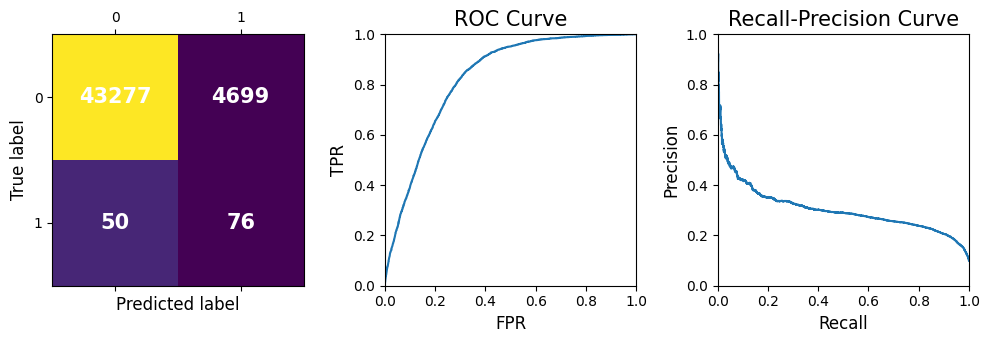

In [13]:
## EBM: Explainable Boosting Machine 
from piml.models import ExplainableBoostingClassifier

# Starting a local timer to measure the training time
ebm_tic = time.time()

ebm = ExplainableBoostingClassifier(interactions=16,outer_bags=4,max_interaction_bins=64,max_bins=512, early_stopping_rounds = 100, learning_rate = 0.05, min_samples_leaf = 10, random_state=SEED)
exp.model_train(model=ebm, name='EBM') #Training the EBM model

# end local timer
ebm_toc = time.time() - ebm_tic
print('EBM training completed in %.2f s.' % (ebm_toc)) #Printing training time
 
exp.model_diagnose(model="EBM", show='accuracy_table') #Test model performance using diagnostic tools and show accuracy results with a table
exp.model_diagnose(model="EBM", show='accuracy_plot', figsize=(10,4))

We trained an Explainable Boosting Machine model which is known for its interpretability. We added a local timer to calculate the training time of the model.

The parameters used in the EBM model are:

**interactions**: The maximum number of interactions between features that the model can consider. This helps capture complex relationships between features.

**outer_bags**: The number of outer bags used for bagging during training. Bagging helps improve model stability and generalization.

**max_interaction_bins**: The maximum number of bins to use when discretizing interactions. Discretization is a process of transforming continuous features into categorical features.

**max_bins**: The maximum number of bins to use when discretizing individual features.

**early_stopping_rounds**: The number of consecutive iterations without improvement in the loss function to trigger early stopping during training.

**learning_rate**: The learning rate determines the step size at each iteration during training.

**min_samples_leaf**: The minimum number of samples required to be at a leaf node during training.

**random_state**: A seed value ensuring reproducibility.

We also created an accuracy table to showcase various metrics that can assess model performance. The table does show a high test accuracy rate as well as a high AUC, which indicate that the model is performing well.
However, we still need to train other models to compare them and see which one has the best results.

**Score EBM Test Data and write submission file**

In [14]:
#adding predicted results from EBM to a dataframe
piml_EBM = pd.DataFrame(exp.experiment.registered_pipeline['EBM'].predict_proba(test[x_names].to_numpy()), columns=['p0','phat'])
#printing first 5 rows 
print(piml_EBM.head())
#exporting to csv file
piml_EBM['phat'].to_csv('group3_piml_EBM.csv', index=False)


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

         p0      phat
0  0.920389  0.079611
1  0.969301  0.030699
2  0.814272  0.185728
3  0.974559  0.025441
4  0.802908  0.197092


**Generalized Linear Model (GLM)**

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

GLM training completed in 5.69 s.


,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.9037,0.7685,0.0018,0.1624,0.0035
Test,0.8999,0.7709,0.0021,0.1724,0.0041
Gap,-0.0038,0.0024,0.0003,0.0100,0.0006


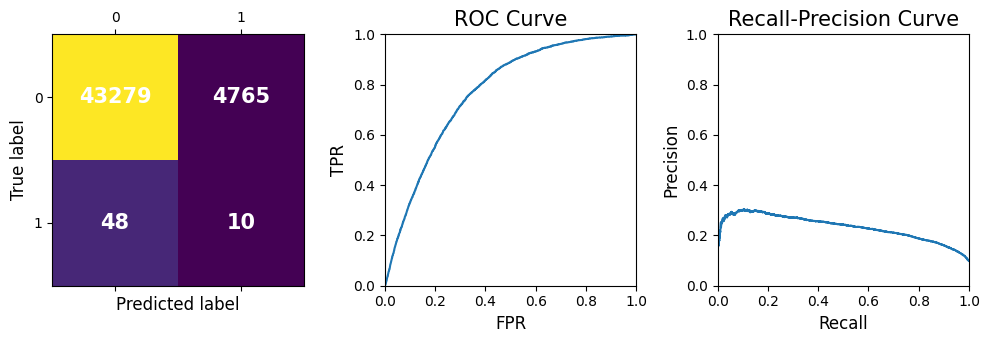

In [15]:
from piml.models import GLMClassifier

# Starting a local timer to measure the training time
glm_tic = time.time()

glm = GLMClassifier(l1_regularzation=0.0008, l2_regularzation=0.0008,random_state=SEED)
exp.model_train(model=glm, name='GLM') #Training the GLM model

# end local timer
glm_toc = time.time() - glm_tic
print('GLM training completed in %.2f s.' % (glm_toc)) #Printing training time

exp.model_diagnose(model="GLM", show='accuracy_table') #Test model performance using diagnostic tools and show accuracy results with a table
exp.model_diagnose(model="GLM", show='accuracy_plot', figsize=(10,4))

We trained a Generalized Linear Model and added a local timer to calculate the training time of the model. 

The **l1_regularization** (Lasso) and **l2_regularization** (Ridge) have been used as parameters in the model to prevent overfitting. The values of these parameters determine the strength of regularization applied to the GLM model during training. 

The table shows a fair AUC but we will be training other models to make a comparison to see which one has the best performance.

**Score GLM Test Data and write submission file** 

In [16]:
#adding predicted results from GLM to a dataframe
piml_GLM = pd.DataFrame(exp.experiment.registered_pipeline['GLM'].predict_proba(test[x_names].to_numpy()), columns=['p0','phat'])
#printing first 5 rows
print(piml_GLM.head())
#exporting to csv file
piml_GLM['phat'].to_csv('group3_piml_GLM.csv', index=False) 

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

         p0      phat
0  0.854801  0.145199
1  0.929850  0.070150
2  0.849668  0.150332
3  0.997725  0.002275
4  0.851560  0.148440


**Generalized Additive Model (GAM)**

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

did not converge
GAM training completed in 436.82 s.


,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.9031,0.7864,0.0064,0.2421,0.0125
Test,0.9001,0.7871,0.0086,0.3596,0.0168
Gap,-0.0030,0.0006,0.0022,0.1175,0.0042


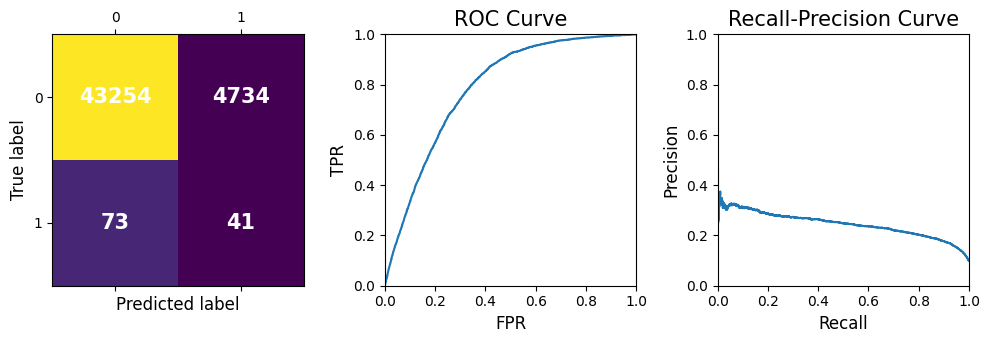

In [17]:
from piml.models import GAMClassifier

# Starting a local timer to measure the training time
gam_tic = time.time()

gam = GAMClassifier(spline_order=3, n_splines=30, lam=0.5)
exp.model_train(model=gam, name='GAM') #Training the GAM model

# end local timer
gam_toc = time.time() - gam_tic
print('GAM training completed in %.2f s.' % (gam_toc)) #Printing training time

exp.model_diagnose(model="GAM", show='accuracy_table') #Test model performance using diagnostic tools and show accuracy results with a table
exp.model_diagnose(model="GAM", show='accuracy_plot', figsize=(10,4))

We trained a Generalized Additive Model and following specific parameters were used during training:

**spline_order**: The order of the spline basis functions used in the GAM model. The spline order determines the flexibility of the model in capturing non-linear relationships.

**n_splines**: The number of spline basis functions to use. Increasing the number of splines allows the model to capture more intricate patterns in the data.

**lam**: The smoothing parameter used to control the smoothness of the fitted splines. It determines the trade-off between fitting the training data and maintaining smoothness.

**Score GAM Test Data and write submission file** 

In [18]:
#adding predicted results from GAM to a dataframe
piml_GAM = pd.DataFrame(exp.experiment.registered_pipeline['GAM'].predict_proba(test[x_names].to_numpy()), columns=['p0','phat']) 
#printing the first 5 rows
print(piml_GAM.head())
#exporting results to csv file
piml_GAM['phat'].to_csv('group3_piml_GAM.csv', index=False)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

         p0      phat
0  0.890006  0.109994
1  0.949571  0.050429
2  0.833166  0.166834
3  0.979083  0.020917
4  0.832735  0.167265


**Extreme Gradient Boosting (XGB) Model**

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

XGB training completed in 3.15 s.


,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.9047,0.8259,0.0089,0.5938,0.0174
Test,0.9009,0.8224,0.0080,0.5507,0.0157
Gap,-0.0038,-0.0036,-0.0009,-0.0430,-0.0018


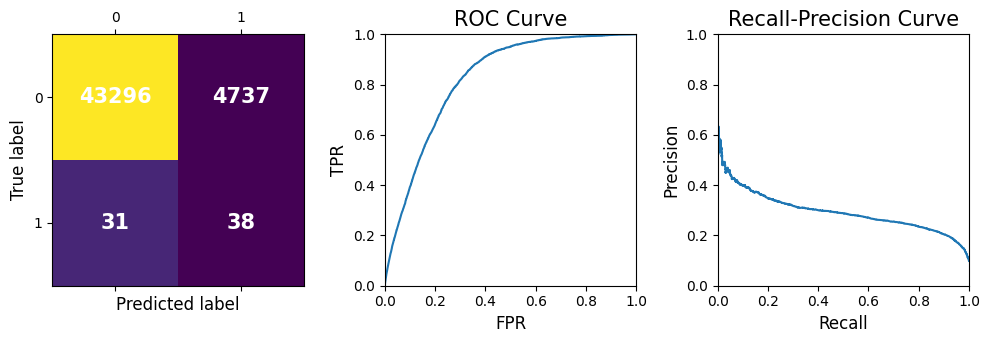

In [19]:
from piml.models import XGB2Classifier

# Starting a local timer to measure the training time
xgb_tic = time.time()

xgb2 = XGB2Classifier(reg_alpha = 0.005, reg_lambda=0.005, gamma= 0.5,random_state=SEED)
exp.model_train(model=xgb2, name='XGB') #Training the XGB model

# end local timer
xgb_toc = time.time() - xgb_tic
print('XGB training completed in %.2f s.' % (xgb_toc)) #Printing training time

exp.model_diagnose(model="XGB", show='accuracy_table') #Test model performance using diagnostic tools and show accuracy results with a table 
exp.model_diagnose(model="XGB", show='accuracy_plot', figsize=(10,4))

We created an XGBoost Classifier with the following specific parameters:

**reg_alpha**: The L1 regularization term on the weights. It encourages the model to have smaller weights for reducing overfitting.

**reg_lambda**: The L2 regularization term on the weights. It helps to prevent overfitting by penalizing large weights.

**gamma**: The minimum loss reduction required to make a further partition on a leaf node of the tree. It controls the complexity of the tree by setting a threshold for additional splits.

**random_state**: A seed value ensuring reproducibility.

**Score XGB Test Data and write submission file** 

In [20]:
#adding predicted results from XGB to a dataframe
piml_XGB = pd.DataFrame(exp.experiment.registered_pipeline['XGB'].predict_proba(test[x_names].to_numpy()), columns=['p0','phat'])
#printing the first 5 rows
print(piml_XGB.head())
#exporting to csv file
piml_XGB['phat'].to_csv('group3_piml_XGB.csv', index=False)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

         p0      phat
0  0.937880  0.062120
1  0.965574  0.034426
2  0.824319  0.175681
3  0.978875  0.021125
4  0.791453  0.208547


**Decision Tree Model**

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Tree training completed in 0.40 s.


,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.9066,0.8403,0.0384,0.7128,0.0729
Test,0.9003,0.8036,0.0239,0.4615,0.0454
Gap,-0.0063,-0.0367,-0.0145,-0.2513,-0.0275


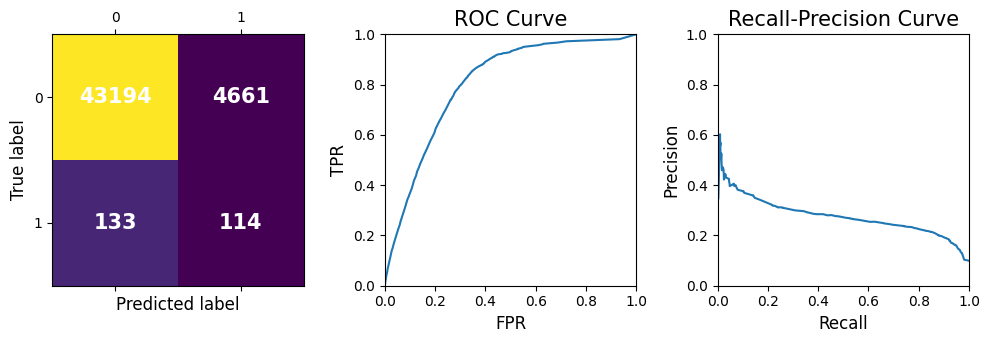

In [21]:
from piml.models import TreeClassifier

# Starting a local timer to measure the training time
tree_tic = time.time()

tree=TreeClassifier(max_depth=10,random_state=SEED)
exp.model_train(model=tree, name='tree') #Training the Tree model

# end local timer
tree_toc = time.time() - tree_tic
print('Tree training completed in %.2f s.' % (tree_toc)) #Printing training time

exp.model_diagnose(model="tree", show='accuracy_table') #Test model performance using diagnostic tools and show accuracy results with a table
exp.model_diagnose(model="tree", show='accuracy_plot', figsize=(10,4))

We trained a Decision Tree model with the following specific parameters:

**max_depth**: The maximum depth of the decision tree. This parameter controls the complexity and depth of the tree. A larger value allows the tree to capture more complex patterns but increases the risk of overfitting.

**random_state**: A seed value ensuring reproducibility.

**Score Decision Tree Test Data and write submission file** 

In [22]:
#adding predicted results from Tree model to a dataframe
piml_Tree = pd.DataFrame(exp.experiment.registered_pipeline['tree'].predict_proba(test[x_names].to_numpy()), columns=['p0','phat'])
#printing first 5 rows
print(piml_Tree.head())
#exporting to csv file
piml_Tree['phat'].to_csv('group3_piml_tree.csv', index=False)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

         p0      phat
0  0.807018  0.192982
1  0.975316  0.024684
2  0.819057  0.180943
3  0.958115  0.041885
4  0.747925  0.252075


**PiML model explanations**

In [23]:
exp.model_explain()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

**PiML model interpretations**

In [24]:
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

**Model Comparison**

In [28]:
exp.model_compare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

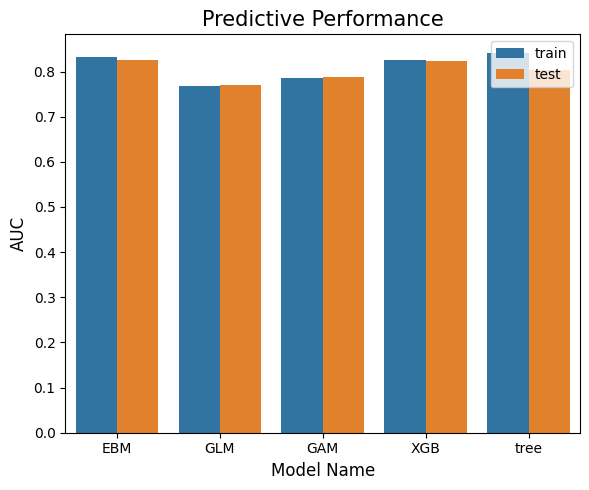

In [25]:
exp.model_compare(models=['EBM', 'GLM', 'GAM', 'XGB', 'tree'], show='accuracy_plot', metric="AUC", figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

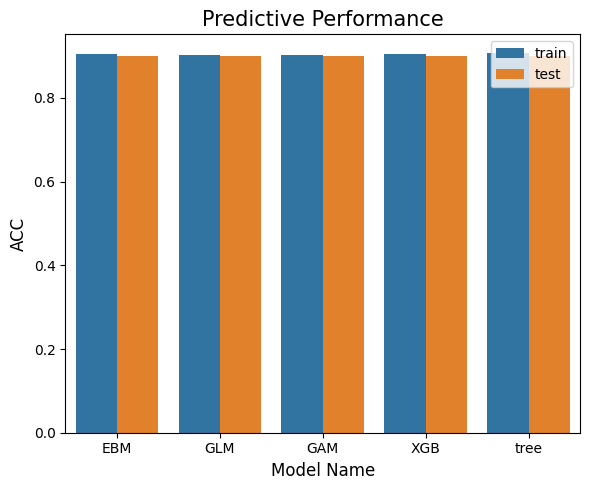

In [26]:
exp.model_compare(models=['EBM', 'GLM', 'GAM', 'XGB', 'tree'], show='accuracy_plot', metric="ACC", figsize=(6, 5))

**End Global Timer**

In [27]:
#ending timer to calculate total time for all tasks
toc = time.time() - tic
print('All tasks completed in %.2f s.' % (toc))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

All tasks completed in 1130.23 s.
